In [23]:
import pandas as pd

# 파일 경로
file_path = '2020_2022서울노인보행자사고.csv'

# CSV 파일 로드
data = pd.read_csv(file_path, encoding='cp949')


# 데이터의 처음 몇 줄을 다시 출력
data.head()


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100198,2020년 1월 1일 15시,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,맑음,단일로 - 기타,승용,남,19세,상해없음,보행자,여,69세,경상
1,2020010100100286,2020년 1월 1일 19시,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,흐림,기타 - 기타,승용,여,72세,상해없음,보행자,여,77세,중상
2,2020010100100288,2020년 1월 1일 19시,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로안,승용,남,37세,상해없음,보행자,남,68세,경상
3,2020010100100333,2020년 1월 1일 21시,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,기타 - 기타,승용,남,34세,상해없음,보행자,남,80세,경상
4,2020010200100036,2020년 1월 2일 06시,목요일,ㄴ서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승합,여,55세,상해없음,보행자,여,73세,중상


In [24]:
# '시군구' 컬럼에서 '구'까지만 추출하여 교통사고 발생 횟수를 다시 집계
data['구'] = data['시군구'].str.extract(r'(서울특별시\s[가-힣]+구)')
accident_counts_by_district = data['구'].value_counts()

# 결과 출력
accident_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 결과 확인


구
서울특별시 동대문구    380
서울특별시 강서구     299
서울특별시 송파구     290
서울특별시 중랑구     276
서울특별시 성북구     268
Name: count, dtype: int64

In [4]:
# 데이터의 처음 몇 줄을 출력하여 구조 확인
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구
0,2020010100100198,2020년 1월 1일 15시,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,19세,상해없음,보행자,여,69세,경상,서울특별시 도봉구
1,2020010100100286,2020년 1월 1일 19시,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,기타 - 기타,승용,여,72세,상해없음,보행자,여,77세,중상,서울특별시 동대문구
2,2020010100100288,2020년 1월 1일 19시,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,37세,상해없음,보행자,남,68세,경상,서울특별시 강동구
3,2020010100100333,2020년 1월 1일 21시,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,기타 - 기타,승용,남,34세,상해없음,보행자,남,80세,경상,서울특별시 강남구
4,2020010200100036,2020년 1월 2일 06시,목요일,ㄴ서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승합,여,55세,상해없음,보행자,여,73세,중상,서울특별시 양천구


In [5]:
# '피해운전자 연령' 컬럼에서 숫자로 변환할 수 없는 값을 NaN으로 대체
data['피해운전자 연령'] = pd.to_numeric(data['피해운전자 연령'].str.replace('세', '').str.replace(' 이상', ''), errors='coerce')

# NaN 값이 있는 행을 제거
data_cleaned = data.dropna(subset=['피해운전자 연령'])

In [6]:
# 예시: 연령이 가장 낮은 데이터와 가장 높은 데이터 찾기
lowest_age_data = data_cleaned[data_cleaned['피해운전자 연령'] == data_cleaned['피해운전자 연령'].min()]
highest_age_data = data_cleaned[data_cleaned['피해운전자 연령'] == data_cleaned['피해운전자 연령'].max()]

lowest_age_data, highest_age_data

(                  사고번호               사고일시   요일            시군구  사고내용  사망자수  \
 1411  2020101500100585  2020년 10월 15일 19시  목요일  서울특별시 강서구 가양동  중상사고     0   
 
       중상자수  경상자수  부상신고자수          사고유형  ...     도로형태 가해운전자 차종 가해운전자 성별  \
 1411     1     0       0  차대사람 - 보도통행중  ...  기타 - 기타       승용        여   
 
      가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도          구  
 1411      52세       상해없음      보행자        남      4.0       상해없음  서울특별시 강서구  
 
 [1 rows x 23 columns],
                   사고번호               사고일시   요일              시군구  사고내용  사망자수  \
 594   2020050300100174    2020년 5월 3일 13시  일요일    서울특별시 양천구 신정동  경상사고     0   
 782   2020060700100240    2020년 6월 7일 14시  일요일   서울특별시 서대문구 홍제동  경상사고     0   
 926   2020070300100177    2020년 7월 3일 10시  금요일   서울특별시 영등포구 대림동  중상사고     0   
 1005  2020072200100420   2020년 7월 22일 17시  수요일  서울특별시 영등포구 여의도동  경상사고     0   
 3479  2021122000100248  2021년 12월 20일 14시  월요일   서울특별시 서대문구 옥천동  중상사고     0   
 3942  2022040200100176    202

In [20]:
# 60세 미만 데이터의 개수 확인
under_60_count = data_cleaned[data_cleaned['피해운전자 연령'] < 60].shape[0]

# 60세 이상 데이터만 필터링
data_over_60 = data_cleaned[data_cleaned['피해운전자 연령'] >= 60]

under_60_count, data_over_60.shape


(77, (5295, 23))

In [8]:
data_over_60

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,구
0,2020010100100198,2020년 1월 1일 15시,수요일,서울특별시 도봉구 방학동,경상사고,0,0,1,0,차대사람 - 기타,...,단일로 - 기타,승용,남,19세,상해없음,보행자,여,69.0,경상,서울특별시 도봉구
1,2020010100100286,2020년 1월 1일 19시,수요일,서울특별시 동대문구 전농동,중상사고,0,1,0,0,차대사람 - 횡단중,...,기타 - 기타,승용,여,72세,상해없음,보행자,여,77.0,중상,서울특별시 동대문구
2,2020010100100288,2020년 1월 1일 19시,수요일,서울특별시 강동구 암사동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,37세,상해없음,보행자,남,68.0,경상,서울특별시 강동구
3,2020010100100333,2020년 1월 1일 21시,수요일,서울특별시 강남구 삼성동,경상사고,0,0,1,0,차대사람 - 횡단중,...,기타 - 기타,승용,남,34세,상해없음,보행자,남,80.0,경상,서울특별시 강남구
4,2020010200100036,2020년 1월 2일 06시,목요일,ㄴ서울특별시 양천구 신정동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승합,여,55세,상해없음,보행자,여,73.0,중상,서울특별시 양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,2022123100100067,2022년 12월 31일 04시,토요일,서울특별시 마포구 성산동,중상사고,0,1,0,0,차대사람 - 횡단중,...,단일로 - 기타,승용,남,58세,상해없음,보행자,여,65.0,중상,서울특별시 마포구
5369,2022123100100071,2022년 12월 31일 04시,토요일,서울특별시 강서구 가양동,중상사고,0,1,0,0,차대사람 - 횡단중,...,교차로 - 교차로안,승용,남,70세,상해없음,보행자,남,77.0,중상,서울특별시 강서구
5370,2022123100100155,2022년 12월 31일 11시,토요일,서울특별시 동대문구 장안동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,단일로 - 기타,승합,남,55세,상해없음,보행자,남,71.0,중상,서울특별시 동대문구
5371,2022123100100262,2022년 12월 31일 14시,토요일,서울특별시 강서구 가양동,중상사고,0,1,0,0,차대사람 - 차도통행중,...,단일로 - 기타,이륜,남,41세,상해없음,보행자,남,74.0,중상,서울특별시 강서구


In [22]:
# '피해운전자 연령' 별로 사고 건수 집계 (60세 이상 데이터에 대해서)
age_accident_counts_over_60 = data_over_60['피해운전자 연령'].value_counts().sort_index()

# 결과 출력
age_accident_counts_over_60.head(10)  # 처음 몇 개의 연령 데이터만 출력하여 확인


피해운전자 연령
60.0      2
61.0      1
62.0      4
63.0      5
64.0      4
65.0    406
66.0    314
67.0    331
68.0    333
69.0    312
Name: count, dtype: int64

In [9]:
# 노인 인구수 데이터 파일 경로
population_file_path = '주민등록인구(연령별_동별)_20240123142830.csv'

# CSV 파일 로드
population_data = pd.read_csv(population_file_path, encoding='utf-8')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
population_data.head()


,동별(1),항목,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2021.8,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8
0,동별(1),항목,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,...,100세 이상,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,계,726905,533767,406116,300147,188621,90072,33584,9211,...,1665,729540,585417,410611,305700,219981,101884,34635,7864,1319
2,종로구,계,11780,8569,6784,5787,4011,1985,804,291,...,32,11688,9047,6251,5237,4358,2117,729,190,29
3,중구,계,10431,7669,5988,4858,3202,1668,700,205,...,26,10251,8401,5809,4587,3617,1784,670,157,30
4,용산구,계,17332,12245,9547,7842,5666,2939,1197,438,...,73,16847,13093,8778,6935,5776,3080,1097,237,41


In [10]:
# 60세 이상 노인 인구수를 계산하기 위한 컬럼 선택
# 2020년, 2021년, 2022년 데이터를 사용
elderly_population_columns = [col for col in population_data.columns if '2020' in col or '2021' in col or '2022' in col]

# 노인 인구수 합산
# 첫 번째 행(컬럼 설명 행)과 '합계' 행을 제외하고 계산
population_data_elderly = population_data.iloc[2:].copy()
population_data_elderly['노인 인구수'] = population_data_elderly[elderly_population_columns].astype(float).sum(axis=1)

# 결과 확인 (처음 몇 줄만 출력)
population_data_elderly[['동별(1)', '노인 인구수']].head()


,동별(1),노인 인구수
2,종로구,119521.0
3,중구,105030.0
4,용산구,169680.0
5,성동구,205703.0
6,광진구,233658.0


In [11]:
# 교통사고 데이터에서 각 구별 사고 발생 건수 집계
# '구' 컬럼에서 '서울특별시'를 제거하고, 구 이름만 남김
data_over_60['구'] = data_over_60['구'].str.replace('서울특별시 ', '')
accident_counts_by_district = data_over_60['구'].value_counts()

# 교통사고 발생 건수 데이터프레임 생성
accident_counts_df = accident_counts_by_district.reset_index()
accident_counts_df.columns = ['구', '사고 발생 건수']

# 인구수 데이터프레임과 교통사고 발생 건수 데이터프레임 병합
merged_data = pd.merge(population_data_elderly, accident_counts_df, left_on='동별(1)', right_on='구')

# 노인 인구수 대비 교통사고 비율 계산
merged_data['사고 비율(%)'] = (merged_data['사고 발생 건수'] / merged_data['노인 인구수']) * 100

# 결과 확인 (처음 몇 줄만 출력)
merged_data[['구', '노인 인구수', '사고 발생 건수', '사고 비율(%)']].head()


C:\Users\kkt82\AppData\Local\Temp\ipykernel_6040\3022154674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_over_60['구'] = data_over_60['구'].str.replace('서울특별시 ', '')


,구,노인 인구수,사고 발생 건수,사고 비율(%)
0,종로구,119521.0,149,0.124664
1,중구,105030.0,159,0.151385
2,용산구,169680.0,97,0.057166
3,성동구,205703.0,162,0.078754
4,광진구,233658.0,97,0.041514


In [28]:
import pandas as pd
import folium
import json
import webbrowser

# 서울시 지도 생성 및 Choropleth 레이어 추가
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
geo_path = 'new_seoul_geo.json'
with open(geo_path, 'r', encoding='utf-8') as geo_file:
    seoul_geo = json.load(geo_file)

folium.Choropleth(
    geo_data=seoul_geo,
    name='choropleth',
    data=merged_data,
    columns=['구', '사고 발생 건수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인보행자 사고 발생 건수'
).add_to(seoul_map)

# 구 이름 표시
centers_path = 'centers.json'
with open(centers_path, 'r', encoding='utf-8') as file:
    centers = json.load(file)

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(
            html=f"<div style='font-size: 10px; font-family: \"Noto Sans KR\", sans-serif; "
                 f"color: #2c3e50; text-align: center; background-color: #ecf0f1; "
                 f"border: 2px solid #3498db; border-radius: 10px; padding: 3px 6px; "
                 f"white-space: nowrap; display: inline-block;'>{name}</div>"
        )
    ).add_to(seoul_map)

# 지도를 HTML 파일로 저장
map_file_path = '노인보행자 교통사고 구별 Choropleth.html'
seoul_map.save(map_file_path)
# 생성된 HTML 파일 열기
webbrowser.open('노인보행자 교통사고 구별 Choropleth.html')

True

In [13]:
# # seoul_geo.json값이 조금 어긋난거 같아서 바로잡기

# def shift_geojson_coordinates(geojson, lat_shift, lon_shift):
#     """
#     GeoJSON 파일의 모든 좌표를 주어진 값만큼 이동시키는 함수.

#     :param geojson: GeoJSON 데이터.
#     :param lat_shift: 위도 이동 값.
#     :param lon_shift: 경도 이동 값.
#     :return: 이동된 좌표를 가진 새로운 GeoJSON 데이터.
#     """
#     new_geojson = geojson.copy()

#     for feature in new_geojson['features']:
#         geometry = feature['geometry']
#         if geometry['type'] == 'Polygon':
#             new_coordinates = [[[lon + lon_shift, lat + lat_shift] for lon, lat in pair] for pair in geometry['coordinates']]
#             geometry['coordinates'] = new_coordinates
#         elif geometry['type'] == 'MultiPolygon':
#             new_coordinates = [[[[lon + lon_shift, lat + lat_shift] for lon, lat in pair] for pair in polygon] for polygon in geometry['coordinates']]
#             geometry['coordinates'] = new_coordinates

#     return new_geojson

# # GeoJSON 데이터의 좌표를 왼쪽 위로 이동시키기 (예: 위도 -0.001, 경도 -0.001)
# shifted_seoul_geo = shift_geojson_coordinates(seoul_geo, -0.001, -0.00)

# # 수정된 GeoJSON 데이터를 새 파일로 저장
# shifted_geo_path = 'new_seoul_geo.json'
# with open(shifted_geo_path, 'w', encoding='utf-8') as shifted_geo_file:
#     json.dump(shifted_seoul_geo, shifted_geo_file)

# shifted_geo_path


In [14]:
seoul_map

C:\Users\kkt82\AppData\Local\Temp\ipykernel_12876\2841148139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='사고 비율(%)', y='구', data=merged_data.sort_values('사고 비율(%)', ascending=False), palette='coolwarm')


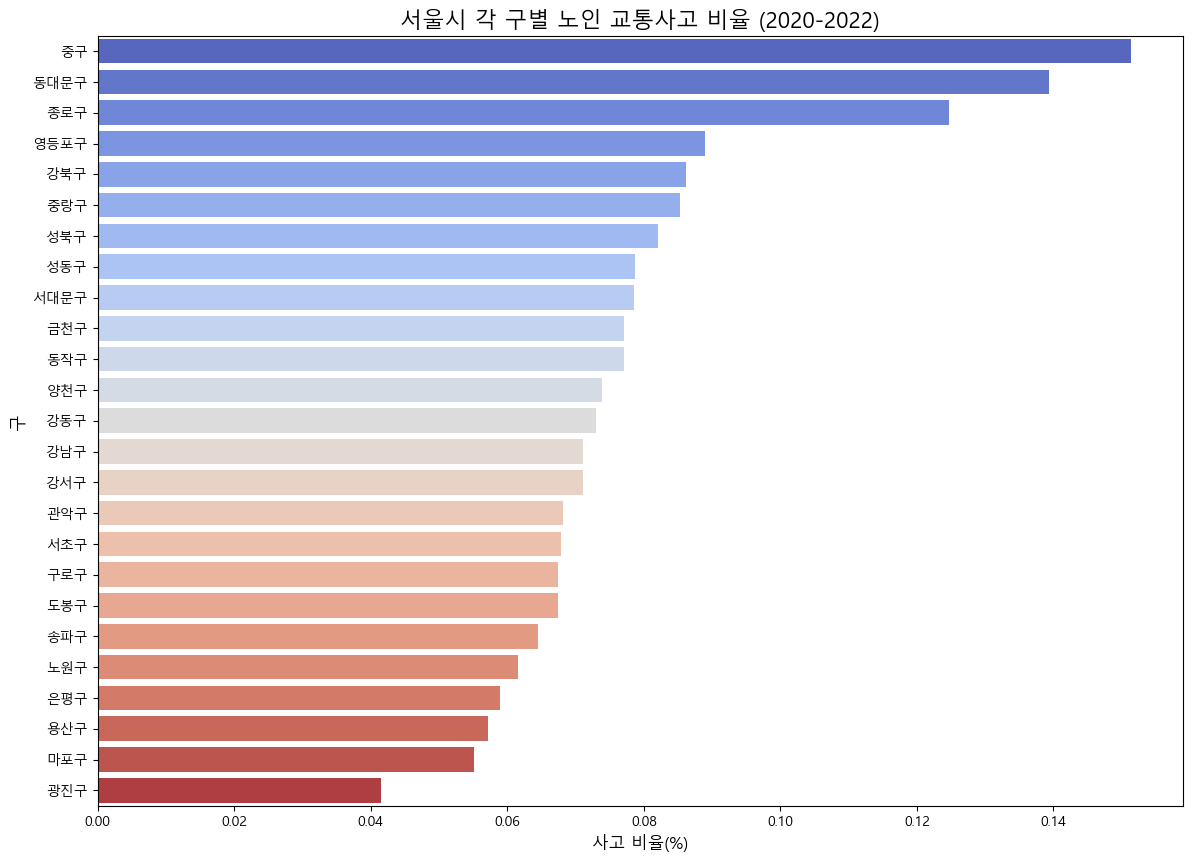

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 그래프 생성 (이전에 생성한 코드를 다시 사용)
plt.figure(figsize=(14, 10))
sns.barplot(x='사고 비율(%)', y='구', data=merged_data.sort_values('사고 비율(%)', ascending=False), palette='coolwarm')
plt.title('서울시 각 구별 노인 교통사고 비율 (2020-2022)', fontsize=16)
plt.xlabel('사고 비율(%)', fontsize=12)
plt.ylabel('구', fontsize=12)
plt.show()


In [14]:
# 서울시 병원 인허가 정보 데이터 파일 로드
hospital_file_path = '서울시 병원 인허가 정보.csv'

# 서울시 병원 인허가 정보 데이터 파일을 'euc-kr' 인코딩으로 로드
hospital_data = pd.read_csv(hospital_file_path, encoding='euc-kr')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
hospital_data.head()

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,진료과목내용명,지정취소일자,완화의료지정형태,완화의료담당부서명,구급차특수,구급차일반,총인원,구조사수,허가병상수,최초지정일자
0,3090000,PHMA220073090033021200001,2007-05-22,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3060000,PHMA220203060034021200001,2020-05-29,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3240000,PHMA220193240033021200001,2019-01-24,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3140000,PHMA220193140033021200001,2019-12-13,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3180000,PHMA220053180034021200007,2006-12-01,NaN,1,영업/정상,13,영업중,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# '도로명주소' 컬럼을 사용하여 구 이름 추출
hospital_data['구'] = hospital_data['도로명주소'].str.extract(r'서울특별시\s([가-힣]+구)')

# 각 구별 병원 수 집계
hospital_counts_by_district = hospital_data['구'].value_counts()

# 결과 출력
hospital_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 확인


구
강남구     68
송파구     41
강서구     39
강동구     35
동대문구    32
Name: count, dtype: int64

In [15]:
import pandas as pd
# 노인 보행자 교통사고 데이터와 병원 수 데이터 병합
combined_data = pd.merge(merged_data[['구', '사고 비율(%)']], 
                         hospital_counts_by_district.rename('병원 수'), 
                         left_on='구', 
                         right_index=True)

# 상관 계수 계산
correlation = combined_data[['사고 비율(%)', '병원 수']].corr()

# 상관 관계 출력
correlation

,사고 비율(%),병원 수
사고 비율(%),1.000000,-0.070955
병원 수,-0.070955,1.000000


In [16]:
import pandas as pd
# 노인 보행자 교통사고 데이터와 병원 수 데이터 병합
combined_data = pd.merge(merged_data[['구', '사고 발생 건수']], 
                         hospital_counts_by_district.rename('병원 수'), 
                         left_on='구', 
                         right_index=True)

# 상관 계수 계산
correlation = combined_data[['사고 발생 건수', '병원 수']].corr()

# 상관 관계 출력
correlation

,사고 발생 건수,병원 수
사고 발생 건수,1.000000,0.573002
병원 수,0.573002,1.000000


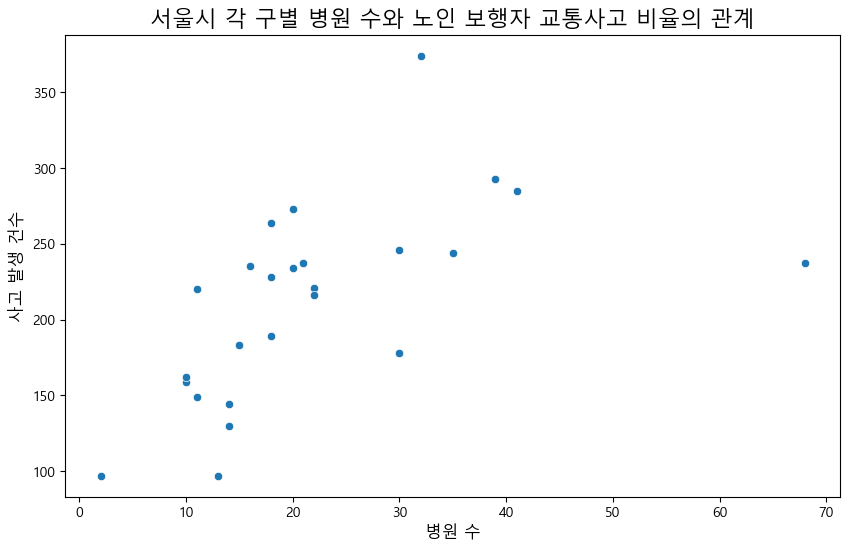

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 산점도로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='병원 수', y='사고 발생 건수')

# 그래프 제목 및 레이블 설정
plt.title('서울시 각 구별 병원 수와 노인 보행자 교통사고 비율의 관계', fontsize=16)
plt.xlabel('병원 수', fontsize=12)
plt.ylabel('사고 발생 건수', fontsize=12)

# 그래프 표시
plt.show()

In [17]:
# 노인여가복지시설 데이터 처리

# 서울시 노인여가복지시설 데이터 파일 로드
elderly_facility_leisure_file_path = '서울시 사회복지시설(노인여가복지시설) 목록.csv'
elderly_facility_leisure_data = pd.read_csv(elderly_facility_leisure_file_path, encoding='cp949')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
elderly_facility_leisure_data.head()

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,성북구립 상월곡실버복지센터,A0495,(노인) 노인복지관(소규모),노인여가복지시설,자치구,김경회,1129000000,성북구,서울특별시 성북구 화랑로18길 6 (상월곡동),NaN,200.0,02-963-1082,2793
1,서초구립양재노인종합복지관,A0724,(노인) 노인복지관,노인여가복지시설,자치구,전경아,1165000000,서초구,서울특별시 서초구 강남대로30길 73-7양재노인종합복지관 (양재동),NaN,1220.0,02-578-1515,6741
2,강서구립봉제산노인복지센터,A0922,(노인) 노인복지관(소규모),노인여가복지시설,자치구,서순애,1150000000,강서구,서울특별시 강서구 초록마을로15길 12,NaN,250.0,02-2605-1553,7676
3,시립중랑노인종합복지관,A1022,(노인) 노인복지관,노인여가복지시설,자치구,조희정,1126000000,중랑구,서울특별시 중랑구 겸재로9길 45(면목동),18000.0,18000.0,02-493-9966,2134
4,강남구립강남노인종합복지관,A1165,(노인) 노인복지관,노인여가복지시설,자치구,고영한,1168000000,강남구,서울특별시 강남구 삼성로 628강남노인종합복지관 (삼성동),NaN,1150.0,02-549-7070,6085


In [18]:
# '시설주소' 컬럼을 사용하여 구 이름 추출
elderly_facility_leisure_data['구'] = elderly_facility_leisure_data['시설주소'].str.extract(r'서울특별시\s([가-힣]+구)')

# 각 구별 노인여가복지시설 수 집계
leisure_facility_counts_by_district = elderly_facility_leisure_data['구'].value_counts()

# 결과 출력
leisure_facility_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 확인

구
금천구    14
성북구     7
강남구     7
은평구     7
도봉구     6
Name: count, dtype: int64

In [19]:
# 서울시 노인의료복지시설 데이터 파일 로드
elderly_facility_medical_file_path = '서울시 사회복지시설(노인의료복지시설) 목록.csv'
elderly_facility_medical_data = pd.read_csv(elderly_facility_medical_file_path, encoding='cp949')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
elderly_facility_medical_data.head()



,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,서울꽃동네신내노인요양원,A0001,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,1126000000,중랑구,서울특별시 중랑구 신내로 194,234.0,234.0,02-490-2609,2052
1,청운노인요양원,A0003,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,1111000000,종로구,서울특별시 종로구 비봉길 76 (구기동),45.0,45.0,02-3217-0057,3001
2,천사노인요양원,A0007,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,1150000000,강서구,서울특별시 강서구 강서로45다길 30-22,161.0,151.0,02-2602-2443,7704
3,서울특별시립 남부노인전문요양원,A0016,(노인) 노인요양시설,노인의료복지시설,자치구,한철수,1156000000,영등포구,경기도 군포시 고산로 589,190.0,188.0,031-390-1003,15820
4,노인요양센터 인영실버,A0099,(노인) 노인요양시설,노인의료복지시설,자치구,이희법,1154500000,금천구,서울특별시 금천구 금하로 596-0,96.0,84.0,02-804-6141,8632


In [20]:
# '시설주소' 컬럼을 사용하여 구 이름 추출
elderly_facility_medical_data['구'] = elderly_facility_medical_data['시설주소'].str.extract(r'서울특별시\s([가-힣]+구)')

# 각 구별 노인의료복지시설 수 집계
medical_facility_counts_by_district = elderly_facility_medical_data['구'].value_counts()

# 결과 출력
medical_facility_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 확인



구
중랑구     57
도봉구     57
관악구     43
강서구     39
동대문구    34
Name: count, dtype: int64

In [21]:
# 서울시 재가노인복지시설 데이터 파일 로드
elderly_facility_homecare_file_path = '서울시 사회복지시설(재가노인복지시설) 목록.csv'
elderly_facility_homecare_data = pd.read_csv(elderly_facility_homecare_file_path, encoding='cp949')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
elderly_facility_homecare_data.head()

,시설명,시설코드,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구코드,시군구명,시설주소,정원(수용인원),현인원,전화번호,우편번호
0,참사랑데이케어센터,A0166,(노인) 재가노인복지시설,재가노인복지시설,자치구,최신영,1171000000,송파구,서울특별시 송파구 마천로 89,17.0,16.0,02-3401-5558,05655
1,우리사랑재가노인지원센터,A0564,(노인) 재가노인복지시설,재가노인복지시설,자치구,정춘선,1123000000,동대문구,서울특별시 동대문구 휘경로12길 83(휘경동),40.0,30.0,02-2215-8027,130876
2,동대문실버데이케어센터,A0638,(노인) 재가노인복지시설,재가노인복지시설,자치구,이동수,1100000000,서울특별시,서울특별시 동대문구 약령시로5길 223층 동대문실버데이케어센터,23.0,23.0,02-920-4547,02476
3,한국씨니어노인복지센터,A0681,(노인) 재가노인복지시설,재가노인복지시설,자치구,반명규,1159000000,동작구,서울특별시 동작구 상도로30길 82층,0.0,0.0,02-815-1922,06964
4,목동종합사회복지관병설목동노인복지센터,A0707,(노인) 재가노인복지시설,재가노인복지시설,자치구,유영덕,1147000000,양천구,서울특별시 양천구 목동중앙북로8길 104목동종합사회복지관 2층,24.0,24.0,02-2651-0809,07949


In [22]:
# '시설주소' 컬럼을 사용하여 구 이름 추출
elderly_facility_homecare_data['구'] = elderly_facility_homecare_data['시설주소'].str.extract(r'서울특별시\s([가-힣]+구)')

# 각 구별 재가노인복지시설 수 집계
homecare_facility_counts_by_district = elderly_facility_homecare_data['구'].value_counts()

# 결과 출력
homecare_facility_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 확인

구
노원구    87
중랑구    87
은평구    78
송파구    78
강서구    74
Name: count, dtype: int64

In [23]:
# 병원, 노인여가복지시설, 노인의료복지시설 수 데이터를 데이터프레임으로 변환
hospital_df = hospital_counts_by_district.rename('병원 수').reset_index().rename(columns={'index': '구'})
leisure_facility_df = leisure_facility_counts_by_district.rename('노인여가복지시설 수').reset_index().rename(columns={'index': '구'})
medical_facility_df = medical_facility_counts_by_district.rename('노인의료복지시설 수').reset_index().rename(columns={'index': '구'})
homecare_facility_df = homecare_facility_counts_by_district.rename('재가노인복지시설 수').reset_index().rename(columns={'index': '구'})

# 모든 데이터 병합
combined_db = pd.merge(merged_data, hospital_df, on='구', how='left')
combined_db = pd.merge(combined_db, leisure_facility_df, on='구', how='left')
combined_db = pd.merge(combined_db, medical_facility_df, on='구', how='left')
combined_db = pd.merge(combined_db, homecare_facility_df, on='구', how='left')

# 결측값 처리 (NaN을 0으로 대체)
combined_db.fillna(0, inplace=True)

# 결과 데이터프레임 확인
combined_db.head()

,동별(1),항목,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2022.7,2022.8,노인 인구수,구,사고 발생 건수,사고 비율(%),병원 수,노인여가복지시설 수,노인의료복지시설 수,재가노인복지시설 수
0,종로구,계,11780,8569,6784,5787,4011,1985,804,291,...,190,29,119521.0,종로구,149,0.124664,11,2,11,16
1,중구,계,10431,7669,5988,4858,3202,1668,700,205,...,157,30,105030.0,중구,159,0.151385,10,2,3,19
2,용산구,계,17332,12245,9547,7842,5666,2939,1197,438,...,237,41,169680.0,용산구,97,0.057166,2,2,4,13
3,성동구,계,21893,14994,11569,9065,5878,2654,935,254,...,201,50,205703.0,성동구,162,0.078754,10,5,7,32
4,광진구,계,25518,17703,12896,9593,6118,2752,991,288,...,252,44,233658.0,광진구,97,0.041514,13,1,22,34


In [24]:
# 결과 데이터프레임을 '종합db.csv' 파일로 저장
combined_db_file_path = '종합db2.csv'
combined_db.to_csv(combined_db_file_path, index=False)

combined_db_file_path

'종합db2.csv'

In [25]:
# 필요한 컬럼들만 선택하여 새로운 데이터프레임 생성
selected_columns = ['구', '노인 인구수', '사고 발생 건수', '사고 비율(%)', '병원 수', 
                    '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
reduced_db = combined_db[selected_columns]

# 결과 확인
reduced_db.head()

,구,노인 인구수,사고 발생 건수,사고 비율(%),병원 수,노인여가복지시설 수,노인의료복지시설 수,재가노인복지시설 수
0,종로구,119521.0,149,0.124664,11,2,11,16
1,중구,105030.0,159,0.151385,10,2,3,19
2,용산구,169680.0,97,0.057166,2,2,4,13
3,성동구,205703.0,162,0.078754,10,5,7,32
4,광진구,233658.0,97,0.041514,13,1,22,34


In [26]:
# 필요한 컬럼들만 포함된 데이터프레임을 '종합db.csv' 파일로 다시 저장
reduced_db.to_csv(combined_db_file_path, index=False)

combined_db_file_path

'종합db2.csv'

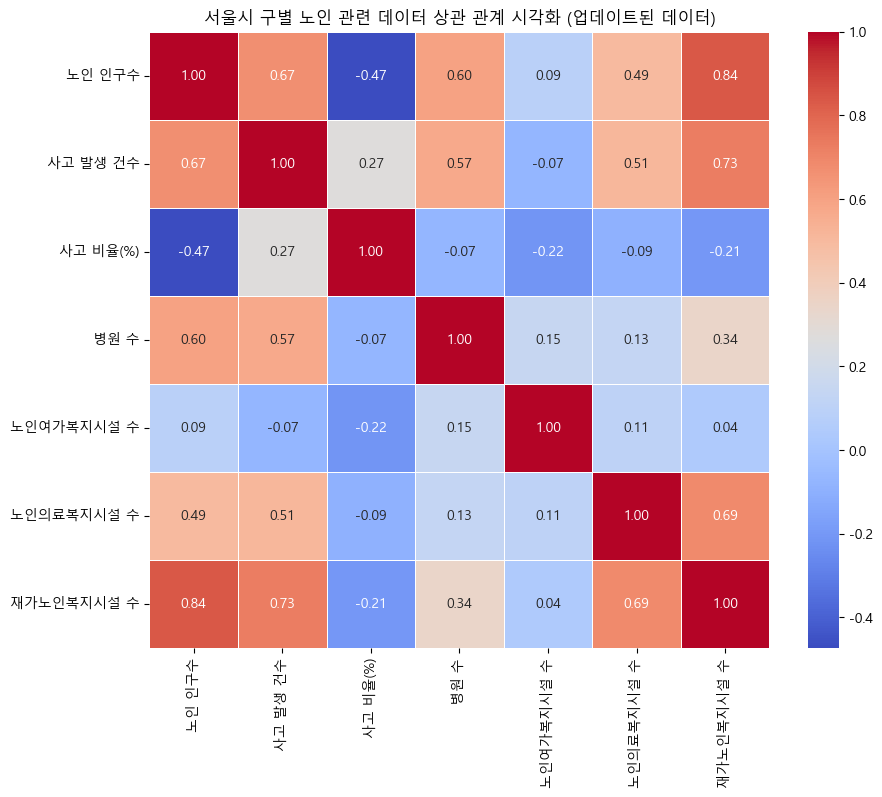

In [33]:
# 수정된 종합db.csv 파일 로드
updated_combined_db = pd.read_csv(combined_db_file_path)

# 문자열 열을 제외한 숫자 열만 선택
numeric_columns = updated_combined_db.select_dtypes(include=['number'])

# 상관 계수 행렬 계산
updated_correlation_matrix = numeric_columns.corr()

# 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('서울시 구별 노인 관련 데이터 상관 관계 시각화 (업데이트된 데이터)')
plt.show()


In [1]:
# !pip install scikit-learn

  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 812.7 kB/s eta 0:00:13
    --------------------------------------- 0.2/10.6 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.6 MB 4.3 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/10.6 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 6.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.6 MB 6.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.2/10.6 MB 6.5 MB/s eta 0:00:02
   ------------- 

In [9]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler

# # 데이터 불러오기 (인코딩 지정)
# data = pd.read_csv('종합db.csv')

# # 결측치 확인 및 처리
# data.isnull().sum()

# # 예측에 사용할 특성 선택 (상관관계가 높은 특성들을 선택하거나 도메인 지식 활용)
# selected_features = data[['구','노인 인구수', '사고 발생 건수', '사고 비율(%)', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']]

# # 원-핫 인코딩을 통해 '구' 열 변환
# selected_features = pd.get_dummies(selected_features, columns=['구'])

# # 타겟 변수 설정
# target = data['사고 발생 건수']

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# # 데이터 표준화
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # 선형 회귀 모델 학습
# model = LinearRegression()
# model.fit(X_train_scaled, y_train)

# # 예측
# y_pred = model.predict(X_test_scaled)

# # 모델 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R-squared: {r2}')

# # 결과 저장
# data['예측노인사고수'] = model.predict(scaler.transform(selected_features))
# data.to_csv('종합DB_with_predictions.csv', index=False)


KeyError: "None of [Index(['구'], dtype='object')] are in the [columns]"

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
data = pd.read_csv('종합db.csv')

# 필요한 열 선택
selected_features = ['노인 인구수', '사고 비율(%)', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]

# 데이터 전처리: 필요한 열 선택 및 결측치 처리
selected_features = ['노인 인구수', '사고 비율(%)', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]
data.fillna(0, inplace=True)

# 데이터 분할: 훈련 데이터와 테스트 데이터로 나누기
X = data.drop(columns=['사고 비율(%)'])
y = data['사고 비율(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선택: 선형 회귀 모델
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가: 평균 제곱 오차(MSE) 및 평균 절대 오차(MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae



(9.796823669879736e-05, 0.008354606430084515)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
data = pd.read_csv('종합db.csv')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 필요한 열 선택
selected_features = ['노인 인구수', '사고 비율(%)', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]

# 데이터 전처리: 필요한 열 선택 및 결측치 처리
selected_features = ['노인 인구수', '사고 비율(%)', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]
data.fillna(0, inplace=True)

# 데이터 분할: 훈련 데이터와 테스트 데이터로 나누기
X = data.drop(columns=['사고 비율(%)'])
y = data['사고 비율(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선택: 선형 회귀 모델
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가: 평균 제곱 오차(MSE) 및 평균 절대 오차(MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae


(9.796823669879736e-05, 0.008354606430084515)

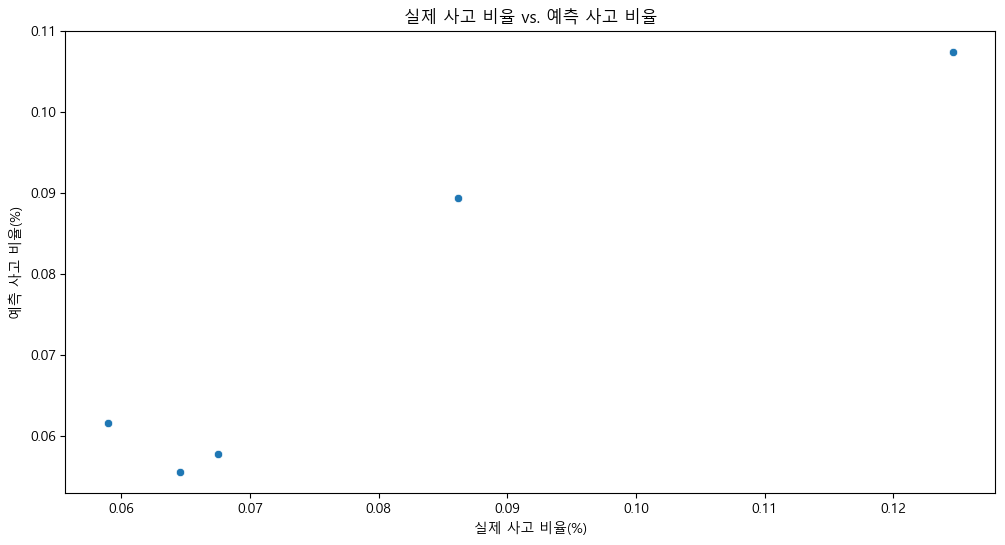

In [8]:
# 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('실제 사고 비율(%)')
plt.ylabel('예측 사고 비율(%)')
plt.title('실제 사고 비율 vs. 예측 사고 비율')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 불러오기
data = pd.read_csv('종합db.csv')

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 필요한 열 선택
selected_features = ['노인 인구수', '사고 발생 건수', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]

# 데이터 전처리: 필요한 열 선택 및 결측치 처리
selected_features = ['노인 인구수', '사고 발생 건수', '병원 수', '노인여가복지시설 수', '노인의료복지시설 수', '재가노인복지시설 수']
data = data[selected_features]
data.fillna(0, inplace=True)

# 데이터 분할: 훈련 데이터와 테스트 데이터로 나누기
X = data.drop(columns=['사고 발생 건수'])
y = data['사고 발생 건수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선택: 선형 회귀 모델
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가: 평균 제곱 오차(MSE) 및 평균 절대 오차(MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

mse, mae


(314.29532299586793, 14.236816782572566)

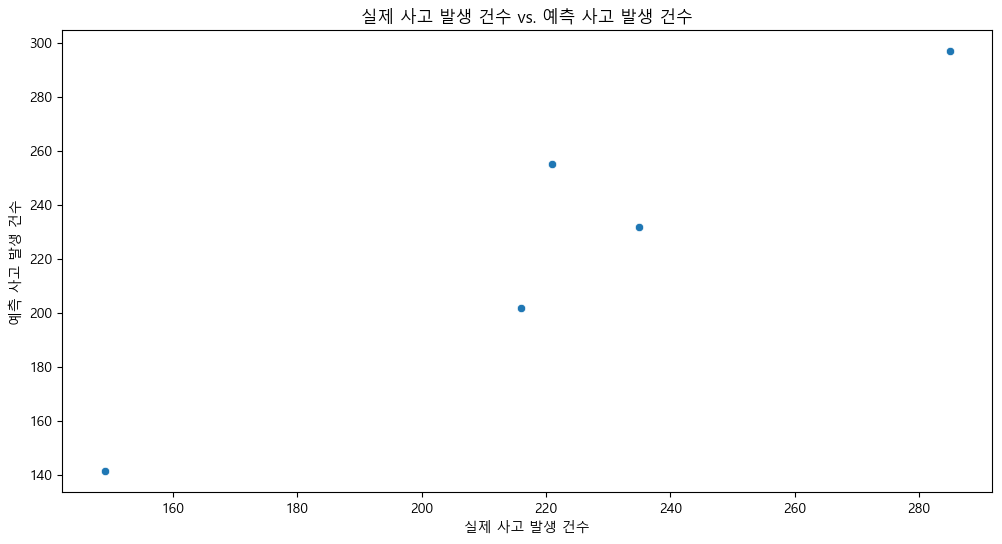

In [2]:
# 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('실제 사고 발생 건수')
plt.ylabel('예측 사고 발생 건수')
plt.title('실제 사고 발생 건수 vs. 예측 사고 발생 건수')
plt.show()